In [6]:
from utils.env import *
from utils.lmp import *
from utils.lmp_wrapper import *
import copy
from utils.cap_prompts import *
import matplotlib.pyplot as plt
from utils.config import *
from moviepy.editor import ImageSequenceClip

pybullet build time: Aug  5 2023 19:43:17


In [7]:
from utils.key_register import set_openai_api_key_from_txt

set_openai_api_key_from_txt(key_path='./key/key.txt',VERBOSE=True)


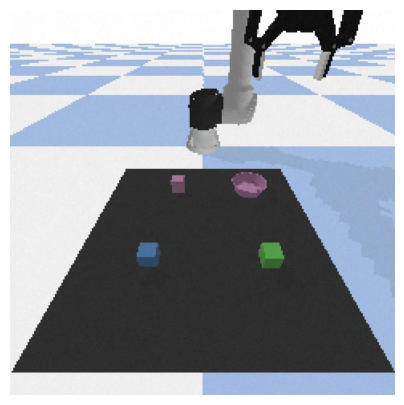

available objects:
['brown block', 'yellow block', 'cyan block', 'blue bowl']


In [10]:
#@title Initialize Env { vertical-output: true }
num_blocks = 3 #@param {type:"slider", min:0, max:4, step:1}
num_bowls = 1 #@param {type:"slider", min:0, max:4, step:1}
high_resolution = False #@param {type:"boolean"}
high_frame_rate = False #@param {type:"boolean"}

# setup env and LMP
env = PickPlaceEnv(render=True, high_res=high_resolution, high_frame_rate=high_frame_rate)
block_list = np.random.choice(ALL_BLOCKS, size=num_blocks, replace=False).tolist()
bowl_list = np.random.choice(ALL_BOWLS, size=num_bowls, replace=False).tolist()
obj_list = block_list + bowl_list
_ = env.reset(['green block', 'purple block', 'blue block','purple bowl'])
lmp_tabletop_ui = setup_LMP(env, cfg_tabletop)

# display env
img =env.get_camera_image()

# display image
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis('off')
plt.show()

print('available objects:')
print(obj_list)

In [11]:
from llm.baseline import Baseline
logger = Baseline(obj_list)

In [19]:
# logger = chatter(['orange block', 'yellow block', 'red block','purple bowl'])
logger.goal_generation()

preference = The user prefers the red block placed in the purple bowl.
        goal1 = The red block is situated in the purple bowl and the orange block is on top of the yellow block.
        goal2 = The red block is sitting in the purple bowl and the yellow block is placed in a pink bowl.


In [23]:
logger.answer_generation(3)
logger.goal_generation()

preference = User would like the red block inside the purple bowl and the orange and yellow blocks in separate spaces.
goal1 = The red block is put in the purple bowl, the orange block is at the top of the table and the yellow block is at the bottom
goal2 = The red block goes into the purple bowl, the yellow block is placed under it and the orange block is on the right side of the table.


In [24]:
logger.answer_generation(2)
goal = logger.final_goal(['green block', 'purple block', 'blue block','purple bowl'])

In [25]:
goal

'goal = the blue block is put in the purple bowl, the green block is at the top of the table and the purple block is at the bottom'

In [26]:
logger.log

['preference = The user prefers the red block placed in the purple bowl.\n        goal1 = The red block is situated in the purple bowl and the orange block is on top of the yellow block.\n        goal2 = The red block is sitting in the purple bowl and the yellow block is placed in a pink bowl.',
 'Both of them are bad. You need to explore more',
 'preference = User prefers the red block to be placed in the purple bowl, the orange block should be kept separate and not on top of the yellow block.\n        \n        goal1 = The red block is gently placed into the purple bowl, the orange block is kept on the ground away from the yellow block.\n        \n        goal2 = The red block is carefully inserted into the purple bowl, the orange block is located at a corner not touching any other object.',
 'Both of them are bad. You need to explore more',
 'preference = user likes to have the red block in the purple bowl, and the other blocks not piled up\n\ngoal1 = Put the red block in the purple

In [27]:
#@title Interactive Demo { vertical-output: true }

user_input = "the blue block is put in the purple bowl, the green block is at the top of the table and the purple block is at the bottom"

env.cache_video = []

print('Running policy and recording video...')
lmp_tabletop_ui(user_input, f'objects = {env.object_list}')
import copy
# render video
if env.cache_video:
  rendered_clip = ImageSequenceClip(env.cache_video, fps=35 if high_frame_rate else 25)
  display(rendered_clip.ipython_display(autoplay=1, loop=1))

Running policy and recording video...
Generating...
